# Gym Analysis and Customer Retention Strategy Using Machine Learning 



### Introduction:
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. Model Fitness has digitized a number of its customer profiles. In this project, we will analyze them and come up with a customer retention strategy.
We will:
- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:
 - Identify target groups
 - Suggest measures to cut churn
 - Describe any other patterns you see with respect to interaction with customers

### About the Data:
Model Fitness provided CSV files containing data on churn for a given month and information on the month preceding it. The dataset includes the following fields:
- 'Churn' — the fact of churn for the month in question

#### Current dataset fields: User data for the preceding month
- 'gender'
- 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located
- 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- 'Promo_friends' — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
- 'Phone' — whether the user provided their phone number
- 'Age'
- 'Lifetime' — the time (in months) since the customer first came to the gym

#### Data from the log of visits and purchases and data on current membership status:
- 'Contract_period' — 1 month, 3 months, 6 months, or 1 year
- 'Month_to_end_contract' — the months remaining until the contract expires
- 'Group_visits' — whether the user takes part in group sessions
- 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
- 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month
- 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

### Data Preprocessing and EDA

In [1]:
#importing all libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings("ignore")

In [2]:
gym = pd.read_csv('gym_churn_us.csv')
gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [3]:
#changing the column names to all lower case 
gym.columns = [x.lower() for x in gym.columns]

In [4]:
#looking to make sure the column names have been changed 
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
#looking at total number of rows and columns 
gym.shape

(4000, 14)

In [6]:
#looking at the data types of the dataset 
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [7]:
gym.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

The data contains all numeric values and I can also see that there are no missing values. 

In [8]:
#looking for missing values
gym.duplicated().sum()

0

There are no duplicates.

In [9]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Looking at the mean, the genders seem to be split evenly. It seems like majority of the people that attend this gym also live near it. Almost half the gym memberships are also from employees of a partner company. The average contract period is about 5 months. The average age of the gym attendees are 29. It seems like the average additional charges members accrue is 146.9. The month to end contract is about 4 months. The average lifetime is 3.7 months. 

The standard deviations for the average contract period, age, average additional charges, month to end contract, and lifetime are all high meaning that there are more data points farther from the mean and the distribution is not normal. 

In [10]:
#looking at the total number of churned clients for this period 
gym['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

In [11]:
#looking at percentages
gym['churn'].value_counts(normalize=True)

0    0.73475
1    0.26525
Name: churn, dtype: float64

About 27% of members churned during this period.

In [12]:
#Looking at the mean feature values in churn groups
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


The gender, phone, near location, and age means for the feature values are similar. The mean for the churned clients who used the friends promo is low. Maybe they left because they don't have a gym partner. We can also see the contract period average for those who churned is also close to 2 months. The average additional charges per month, month to end contract, and lifetime is higher for those who did not churn. The average class frequency for those who churned is also lower. 

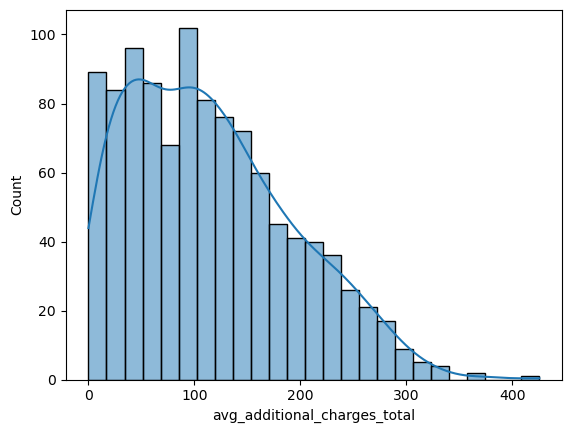

In [13]:
sns.histplot(gym[gym['churn'] == 1]['avg_additional_charges_total'],bins = 25, kde = True);

<AxesSubplot:xlabel='gender', ylabel='Count'>

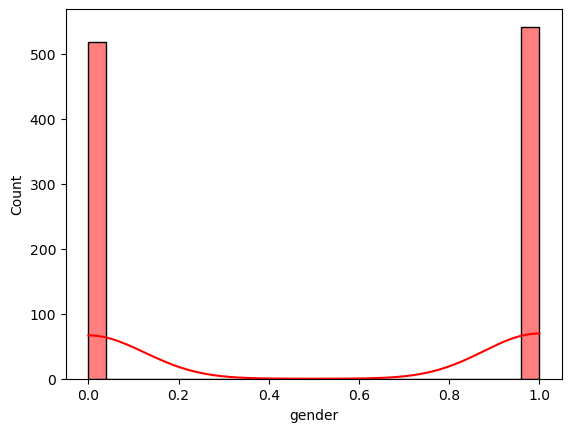

In [14]:
sns.histplot(gym[gym['churn'] == 1]['gender'],bins = 25, kde = True,  color='red', label='Left')

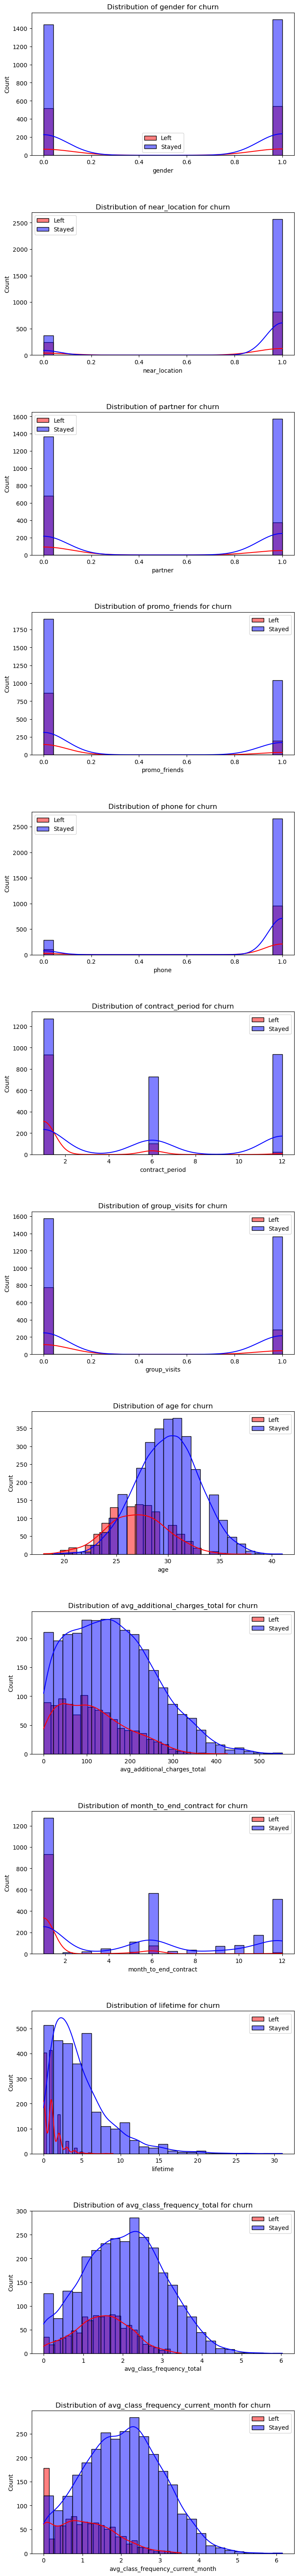

In [15]:
#Plotting bar histograms and feature distributions for those who left (churn) and those who stayed.

#making a list of the name of the columns/ features 
features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone','contract_period', 
            'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 
            'avg_class_frequency_total', 'avg_class_frequency_current_month']

#setting figure and subplot size
fig, axes = plt.subplots(len(features), 1, figsize=(8, len(features)*6))
#setting the space in between plots
plt.subplots_adjust(hspace=0.4)

#creating a for loop to plot all the features vs churned/ not churned
for i, feature in enumerate(features):
    # Plot histogram for those who left
    left_hist = sns.histplot(data=gym[gym['churn'] == 1][feature],
                             bins = 25, kde = True, color='red', label='Left', ax=axes[i])
    
    # Plot histogram for those who stayed
    stayed_hist = sns.histplot(data=gym[gym['churn'] == 0][feature],
                               bins = 25, kde = True, color='blue', label='Stayed', ax=axes[i])
    
    # Set labels and title for the subplot
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {feature} for churn')
    
    # Add legend
    axes[i].legend()

We can see that the distribution for age, month to end contract, average class frequency, and average class frequency for current month are not the same. The distribution for lifetime for those who left is more left skewed and ranges to about 5, where as those who stayed, the distribution is larger. 

In [16]:
#making correlation matrix
correlation = gym.corr()
correlation

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


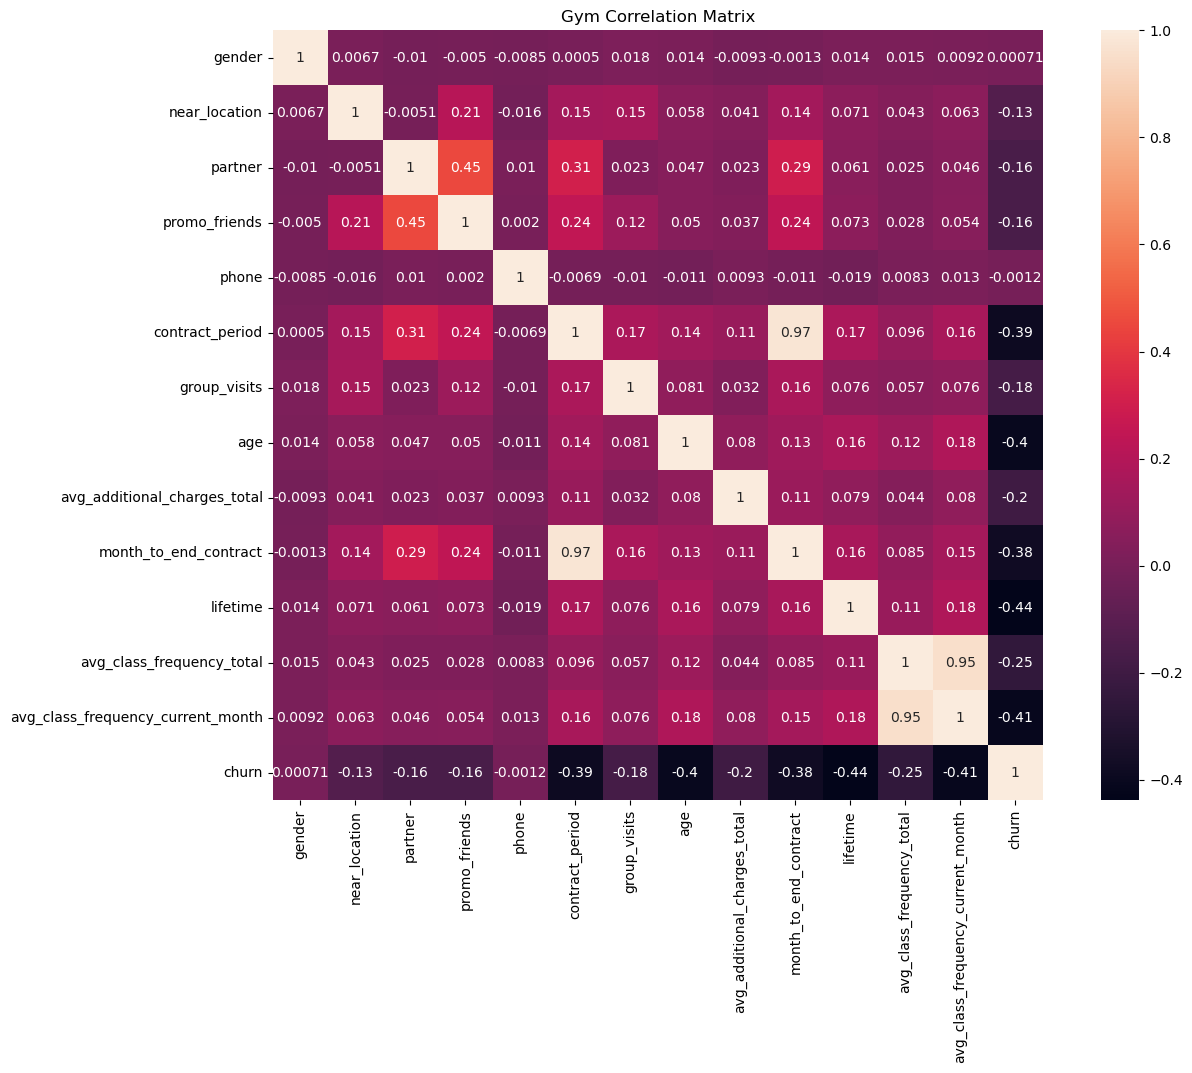

In [17]:
#plotting correlation matrix 
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, square=True)
plt.title('Gym Correlation Matrix');

There is a high positive correlation between contract period and month to end contract period of 0.97. Average class frequency total and average class frequency for current month also have a high positive correlation of 0.95. Partner and promo friends have a moderate correlation of 0.45. 

### Machine Learning Model to Predict User Churn

In [18]:
#dividing the data into features and target variable
X = gym.drop('churn', axis=1)
y = gym['churn']

In [19]:
# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#### Training the model using logistic regression:

In [20]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [21]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

#### Training the model using random forest:

In [22]:
model2= RandomForestClassifier(random_state=0)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
y_pred2 = model2.predict(X_test)
y_pred2

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [24]:
#looking at accuracy, precision, and recall for both models
print('Logistic Regression Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Logistic Regression Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Logistic Regression Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print()
print('Random Forest Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred2)))
print('Random Forest Precision: {:.2f}'.format(precision_score(y_test, y_pred2)))
print('Random Forest Recall: {:.2f}'.format(recall_score(y_test, y_pred2)))

Logistic Regression Accuracy: 0.93
Logistic Regression Precision: 0.86
Logistic Regression Recall: 0.83

Random Forest Accuracy: 0.92
Random Forest Precision: 0.84
Random Forest Recall: 0.82


The accuracy, precision, and recall for the logistic regression model are all higher than the random forest. We can conclude that the logistric regression model performed better here. 

#### Creating User Clusters

In [25]:
#standardizing the data 
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [26]:
#using the linkage() function to build a matrix of distances based on the standardized feature matrix 
linked = linkage(X_sc, method = 'ward') 
linked

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]])

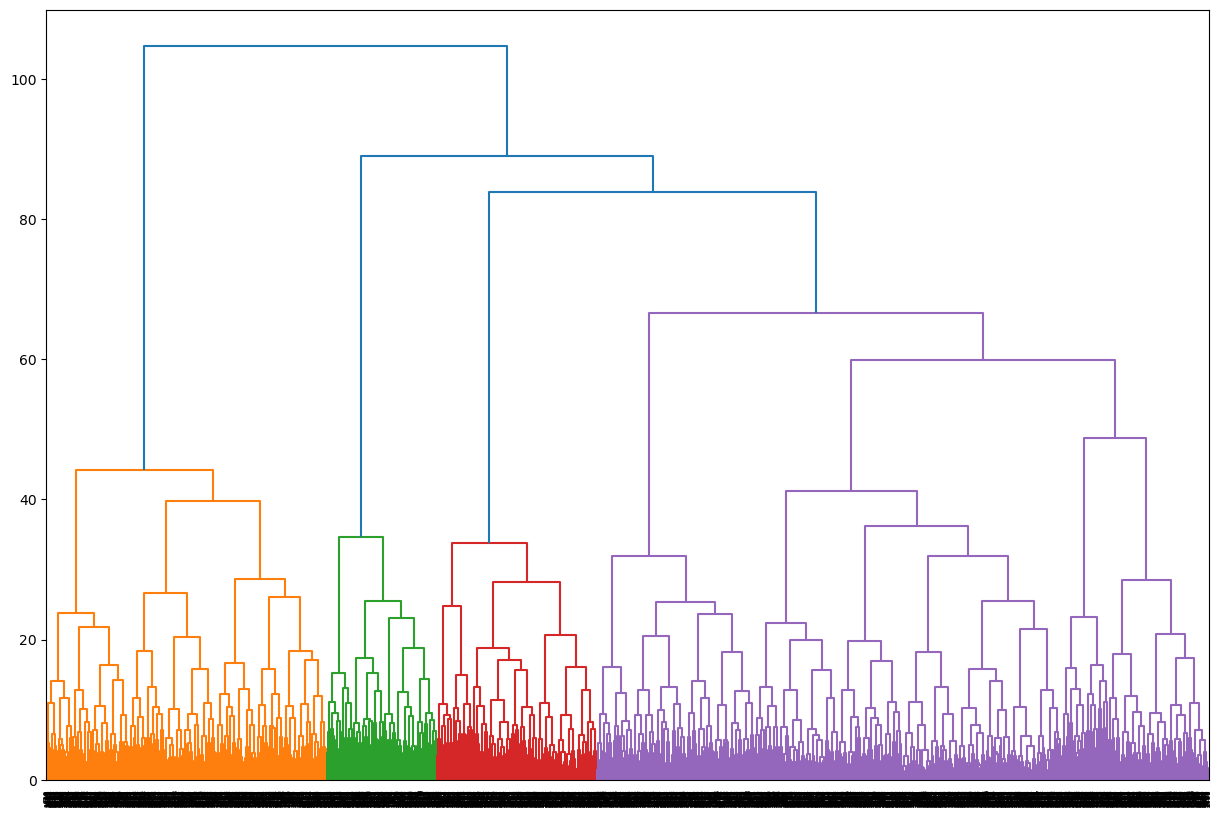

In [27]:
#plotting the dendrogram to view the distance between the objects
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

In [28]:
#Train the clustering model with the K-means algorithm and predict customer clusters. Let the number of clusters be n=5
km = KMeans(n_clusters = 5, random_state=0) 
labels = km.fit_predict(X_sc) 

In [29]:
labels

array([1, 0, 3, ..., 0, 0, 1])

In [30]:
#adding the labels as a column to the dataset
gym['cluster_km'] = labels

In [31]:
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


In [32]:
#looking at the mean feature values for clusters
gym.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Cluster 2 has the lowest mean for promo friends. The contract period is also highest for cluster 0 than other clusters. Cluster 0 and 4 has the highest mean for average additional charges total. Cluster 0 has the highest mean for month to end contract. The calculated churn for cluster 3 was also the higest. 

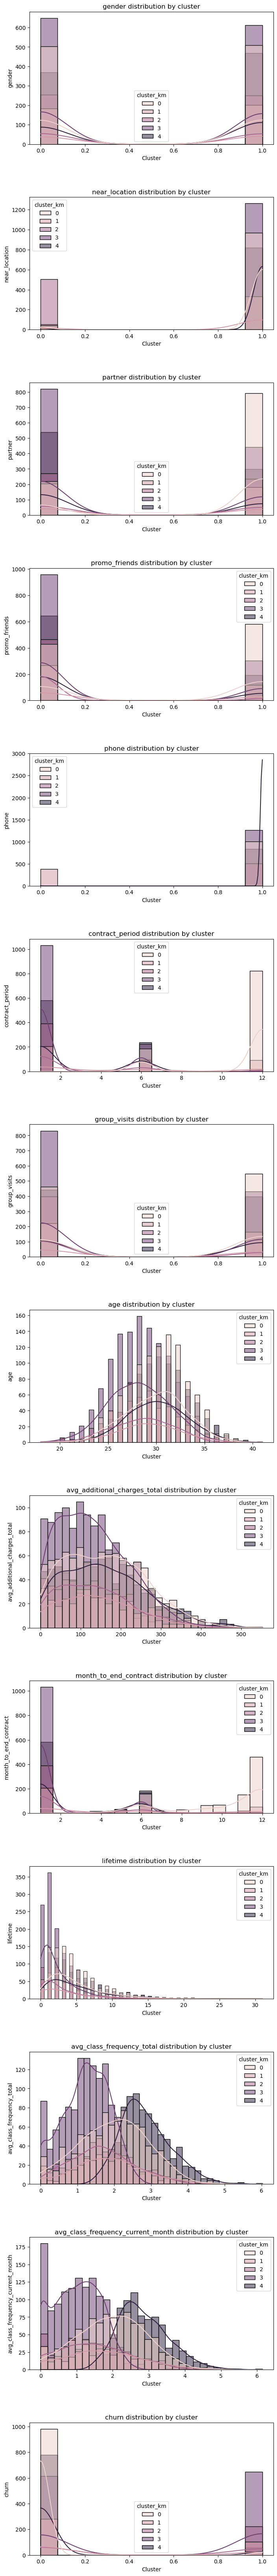

In [33]:
#Plot distributions of features for the clusters.

#making a list of the name of the columns/ features 
features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone','contract_period', 
            'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 
            'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']

#setting figure and subplot size
fig, axes = plt.subplots(len(features), 1, figsize=(8, len(features)*6))
#setting the space in between plots
plt.subplots_adjust(hspace=0.4)

#creating a for loop to plot all the features vs churned/ not churned
for i, feature in enumerate(features):
    sns.histplot(data=gym, x=feature, hue='cluster_km', kde=True, legend= True, ax=axes[i])
    
    # Set labels and title for the subplot
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)
    axes[i].set_title(f'{feature} distribution by cluster')
    
# Display the plot
plt.show()
    
    

Many of the cluster distributions differ, however, age, average additional charges, and lifetime are similar. Average class frequency total and average class frequency current month have similar distributions. 

In [34]:
#Calculate the churn rate for each cluster 
gym.groupby(['cluster_km'])['churn'].value_counts(normalize = True)

cluster_km  churn
0           0        0.972277
            1        0.027723
1           0        0.732468
            1        0.267532
2           0        0.556436
            1        0.443564
3           1        0.514263
            0        0.485737
4           0        0.931981
            1        0.068019
Name: churn, dtype: float64

Clusters 2 and 3 have the highest churn rate and seem more prone to leaving. The clusters that seem the most loyal are cluster 0, followed by cluster 4 then cluster 1. 

In [35]:
from sklearn.metrics import silhouette_score
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.14


The Silhouette score is low which indicates that the clustering results have some degree of separation among the clusters, but there may still be overlap or ambiguity in the assignments. It is also relatively closer to 0, suggesting that the clusters might not be well-separated.

# Conclusion:
The ratio of males and female members are similar. Those who lived close to the gym location are less likely to churn. Those who used the promotion of friends were also less likely to churn. People who are members because of partner companies are also less likely to churn possibly due to the discounted rates. The contract period for the first cluster also had the longest contract term which in turn had the lowest churn rate. This cluster also spent more on the average additional charges. The average age for all clusters were 28-30 year olds. 

# Recommendations: 
Continue to offer bring a friend promotions. Use longer contract periods along with discounts for those with longer contracts so they can spend on in gym services and goods (modeling after cluster 1). Market the gym services and goods to the middle age group as these are the majority of the members. We can also focus our effors in the community on gym members that live closeby. 